In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
from tds_utils import *
import numpy as np
from IPython.display import Audio
import math


In [4]:
#Calculando valores

In [37]:
#Importar la señal
%matplotlib notebook
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import scipy.io.wavfile as wf

filename = 'Patri_amigo.wav'

fs,y = wf.read(filename)

#Play the signal at fs
import sounddevice as sd
print(fs)
sd.play(y,fs)

44100


<IPython.core.display.Javascript object>


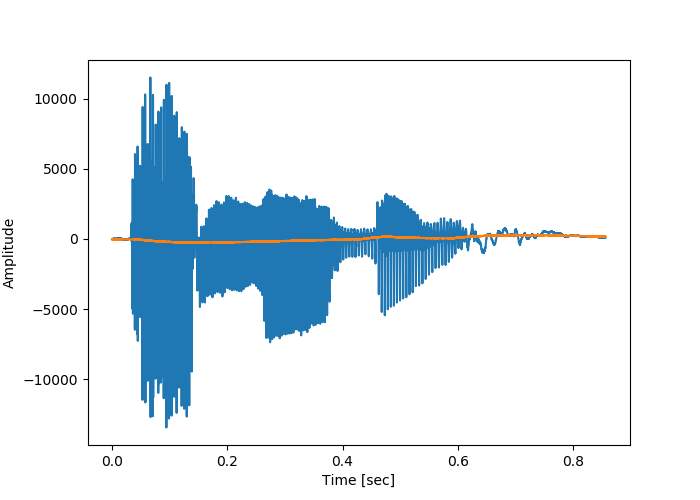

Text(0,0.5,'Amplitude')

In [38]:
#Representar la señal
#plot wav signal
import numpy as np

#time vector de y que es mi señal
t= np.arange(0,len(y)/fs,1/fs)
#equivalente a t= np.arange(0,len(y),fs)

plt.figure(figsize = (7,5))

#plot figure
plt.plot(t,y)


plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

In [39]:
#Muestras por s 
t = np.arange(0,len(y)/fs,1/fs)
print(max(t))

#Maxt / tamaño ventana 20 ms y almacenar num ventana
#Aniquilar jijijiji

numVentana =  math.floor(max(t)/0.02)
print(numVentana)

0.8562585034013606
42


In [40]:
#Calcular el numero de muestras en 20 ms el cual necesitaremos para el rango de cada ventana
# muestras totales / 42  ----> x muestras /ventana
muestrasVentana = math.floor(len(y)/numVentana)
print(muestrasVentana)

899


In [33]:
import scipy.signal as sig
N= int(0.020*fs) #length in samples 20 ms de Ventana

r = sig.boxcar(N)    #rectangular window
h = sig.hamming(N)      #hamming window


r_psd_20,h_psd_20, f_20 = espectro_ventanas(r,h)


idx = f_20>=0
#plot hamming window spectrum
plt.plot(f_20[idx],h_psd_20)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Rect window PSD (dB)')



/home/patricia/Escritorio/TDS/Identificacion_locutor_TDS/tds_utils.py:143: RuntimeWarning: divide by zero encountered in log10
  r_psd = 20*np.log10(np.abs(np.fft.fftshift(Rect_Frec)))
/home/patricia/Escritorio/TDS/Identificacion_locutor_TDS/tds_utils.py:144: RuntimeWarning: divide by zero encountered in log10
  h_psd = 20*np.log10(np.abs(np.fft.fftshift(Hamm_Frec)))


Text(25.4722,0.5,'Rect window PSD (dB)')

<IPython.core.display.Javascript object>


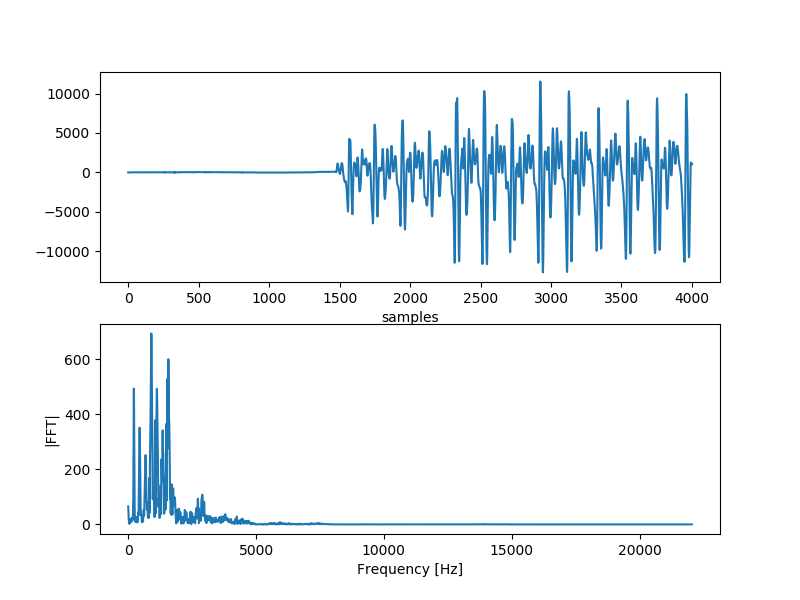

Text(0,0.5,'|FFT|')

In [41]:
#Pasar a espectro


## Representacion voz y FFT para la ventana 0:4000

seg = y[0:4000]

Canal_1 = seg[:,0]

psd1,f1 = my_spectra(Canal_1,fs)

#plot spectra
plt.figure(figsize = (8,6))

plt.subplot(211)
idx1 = f1>=0
plt.plot(Canal_1)
plt.xlabel('samples')

plt.subplot(212)
idx1 = f1>=0
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

<IPython.core.display.Javascript object>


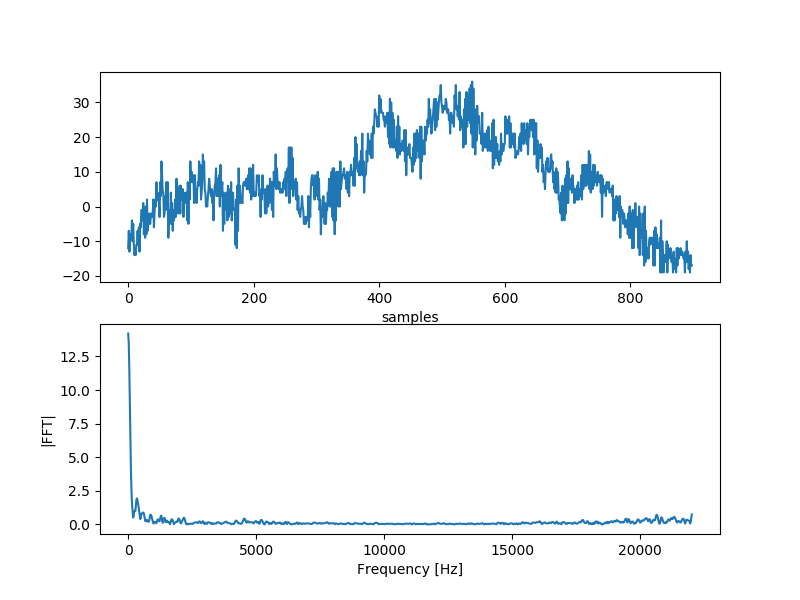

Text(0,0.5,'|FFT|')

In [42]:
#Pasar a espectro

seg = y[0:muestrasVentana]

Canal_1 = seg[:,0]

psd1,f1 = my_spectra(Canal_1,fs)

#plot spectra
plt.figure(figsize = (8,6))

plt.subplot(211)
idx1 = f1>=0
plt.plot(Canal_1)
plt.xlabel('samples')

plt.subplot(212)
idx1 = f1>=0
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')




<IPython.core.display.Javascript object>


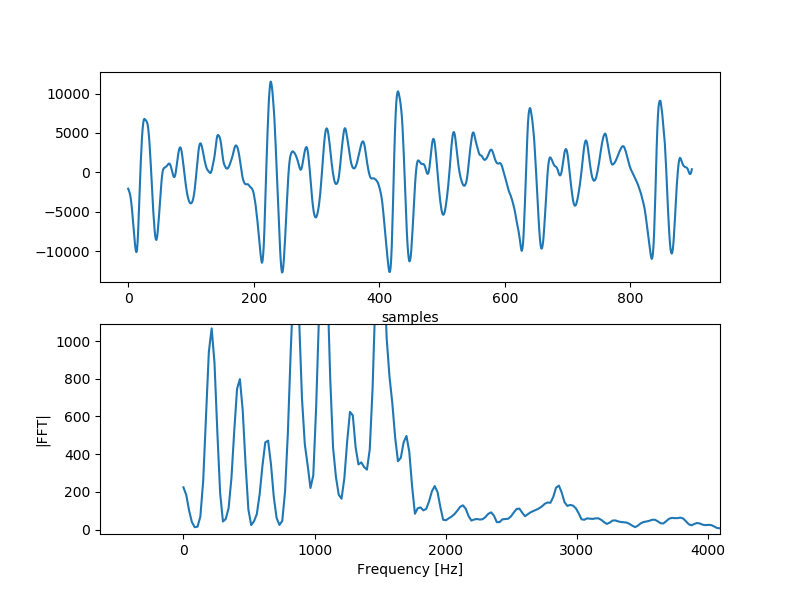

[ -2073  -2275  -2514  -2818  -3277  -3891  -4649  -5554  -6532  -7454
  -8403  -9261  -9869 -10130  -9879  -8868  -7244  -5236  -2981   -768
   1159   2917   4421   5512   6283   6724   6789   6691   6633   6512
   6350   6080   5513   4682   3664   2412    972   -561  -2093  -3612
  -4959  -6182  -7228  -8038  -8495  -8586  -8250  -7563  -6647  -5637
  -4514  -3389  -2263  -1237   -409    125    415    551    587    640
    705    770    848    954   1062   1112   1104    965    732    433
    101   -213   -465   -603   -575   -332    116    710   1334   1937
   2448   2851   3106   3185   3055   2715   2206   1590    924    244
   -442  -1104  -1721  -2273  -2733  -3112  -3421  -3659  -3836  -3929
  -3948  -3891  -3761  -3537  -3212  -2747  -2149  -1433   -612    251
   1143   1966   2698   3242   3579   3697   3616   3400   3068   2677
   2248   1825   1422   1074    762    523    353    242    134     33
    -42    -91     10    265    594    990   1392   1781   2298   2973
   365

In [45]:
seg = y[muestrasVentana*3:muestrasVentana*4]

Canal_1 = seg[:,0]

psd1,f1 = my_spectra(Canal_1,fs)

#plot spectra
plt.figure(figsize = (8,6))

plt.subplot(211)
idx1 = f1>=0
plt.plot(Canal_1)
plt.xlabel('samples')

plt.subplot(212)
idx1 = f1 >=0
plt.plot(f1[idx1],psd1[idx1])
plt.xlabel('Frequency [Hz]')
plt.ylabel('|FFT|')

print(Canal_1)

In [10]:
#Visualizar el canal 0, 1
print(seg.shape)


(899, 2)


In [23]:
print(idx1)
#print(psd1[idx1]> 0.04)
#print(idx1)
array_positivo = []
h=0

longitud_frecuencia = len(idx1)
#print(longitud_frecuencia)
h=0
n=0
while n<longitud_frecuencia:
    if idx1[h]==False:
        h = h+1
    n=n+1
#print(h)

umbral = 500

array_val = []
array_freq = []
k=0
for i in psd1:
    #print(i)
    if i > umbral:
        array_val.append(i)
        array_freq.append(k)
        #print(array_val)
        #print(array_freq)
    k=k+1
j=1        

FFTpitchArray = []
#print(len(array_val))
while j < len(array_val):
    if array_val[j] < array_val[j-1]:
        FFT_pitch = array_val[j-1]
        pitch = array_freq[j-1]
        print(FFT_pitch)
        print(pitch)
        FFTpitchArray.append(FFT_pitch)
        #print(FFTpitchArray)
        break
        
    j=j+1

#print (f1)   

[False False False ...  True  True  True]
785.0857261802348
42


In [29]:
psd1,f1 = my_spectra(Canal_1,fs)
length=0
array_val = []
array_freq = []
FFTpitchArray = []


while f1[length]<0: #cuenta frecuencia negativa
    length = length+1
psd =psd1[length:]
f=f1[length:]

#Poderoso Mike ayuda!!!!
#umbral_Decision = np.mean(psd[0:20])
#print(len(array_val))
j=0
while j < len(array_val):
    if array_val[j] < array_val[j-1]:
        FFT_pitch = array_val[j-1]
        pitch = array_freq[j-1]
        #print(FFT_pitch)
        #print(pitch)
        #break
        FFTpitchArray.append(FFT_pitch)
        #print(FFTpitchArray)
        
    j=j+1
    
    
umbral_Decision = np.mean(FFTpitchArray[0:len(FFTpitchArray)])
print(umbral_Decision)

#umbral = 30
umbral = umbral_Decision
i=0
j=0
while i<len(psd):
    if psd[i]>umbral:
        psd[j]=psd[i]
        f[j]=f[i]
        j=j+1
    i=i+1
length = i
l=False
i=1

pitch=0.0
while l ==False and i<length:
    if psd[i]<psd[i-1]:
        l=True
        pitch= f[i-1]
    i=i+1
print(pitch)

nan
21.533203125


/home/patricia/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/patricia/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
psd1,f1 = my_spectra(Canal_1,fs)
length = 0
while f1[length]<0:
    length = length + 1
psd=psd1[length:]
f=f1[length:]
umbral = 5
i=3
l=True
while l==True:
    if psd[i+1]<psd[i]:
        i=i+1
    else:
        l=False
while i<500:
    if psd[i+2] < psd[i] and psd[i+2] > umbral :
        pitch = f[i]
        break
    i=i+1
    pitch=0.0

print(pitch)



193.798828125


In [29]:
#Copia de seguridad

psd1,f1 = my_spectra(Canal_1,fs)
length = 0
while f1[length]<0:
    length = length + 1
psd=psd1[length:]
f=f1[length:]
umbral= 20
i=0
j=0
while i<len(psd):
    if psd[i]>umbral:
        psd[j]=psd[i]
        f[j]=f[i]
        j=j+1
    i=i+1
length=i
l=False
i=1
pitch=0.0
while l==False and i<length:
    if psd[i]<psd[i-1]:
        l=True
        pitch=f[i-1]
    i=i+1
print(pitch)


21.533203125
